In [4]:
%load_ext autoreload
%autoreload 2
%aimport -c cutils_ext  # Prevent autoreload from trying to reload `cutils_ext`

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from surv_optimizer.db_utils.multi_dataset_model import MusicService
from surv_optimizer.data_processing.DataFitting import SurvivalModelTester
import warnings

warnings.filterwarnings("ignore",
                        message="Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples.*")
warnings.filterwarnings("ignore",
                        message="The effect of Potentials on other parameters is ignored during prior predictive sampling.*")
warnings.filterwarnings("ignore",
                        message=" The effect of Potentials on other parameters is ignored during prior predictive sampling.*")
warnings.filterwarnings("ignore",
                        message="rcParams['plot.max_subplots']*")

# Suppress specific UserWarnings related to tight_layout
with warnings.catch_warnings():
    warnings.simplefilter("ignore", UserWarning)
plt.tight_layout()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Figure size 640x480 with 0 Axes>

In [5]:
music_data = MusicService().get_music_data()
music_data.tracks.drop(pd.to_datetime('2023-03-17'), inplace=True)  #Дырка в данных

Query from snowflake, tracks_rap_cavier has been started
Query from snowflake, tracks_rap_cavier took 88.13927221298218 seconds
Query from snowflake, artists_262 has been started
Query from snowflake, artists_262 took 71.63101053237915 seconds
Query from snowflake, genre_10 has been started
Query from snowflake, genre_10 took 241.603994846344 seconds
Query from snowflake, label_179 has been started
Query from snowflake, label_179 took 15.203734159469604 seconds
Query from snowflake, playlist_12 has been started
Query from snowflake, playlist_12 took 9.021595001220703 seconds


In [71]:
service = MusicService()
a = service.get_merged_data(music_data)
data = service.get_featured_dataset()
data.drop(['explicit', 'featured_artist'], axis=1, inplace=True)
data.replace([np.inf, -np.inf], 0, inplace=True)
music_data.tracks

,isrc,playlist_id,info,streams_playlist,followers,spotify_streams,position,event,artist_id,genre_id,release_date,featured_artist,explicit,label_id
date,,,,,,,,,,,,,,
2022-04-15,AUVWE2200949,37i9dQZF1DWT2SPAYawYcO,Added to playlist at position 8,11,383566,1619.0,8,1,791517632,173,2022-04-13,0,2,9580
2021-12-03,DKUM72100647,37i9dQZF1DX1hVRardJ30X,Added to playlist at position 30,709,599566,1480.0,30,1,1467762067,17,2021-12-03,0,1,10744
2021-12-04,DKUM72100647,37i9dQZF1DX1hVRardJ30X,Position changed from 30 to 31,485,599566,845.0,31,0,1467762067,17,2021-12-03,0,1,10744
2021-12-10,DKUM72100647,37i9dQZF1DX1hVRardJ30X,Removed from playlist,79,599566,217.0,0,2,1467762067,17,2021-12-03,0,1,10744
2024-03-08,DKUM72400058,37i9dQZF1DX1hVRardJ30X,Added to playlist at position 41,406,599566,1161.0,41,1,1467762067,17,2024-03-08,0,2,10744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-20,USUYG1546023,37i9dQZF1DX4y8h9WqDPAE,Position changed from 90 to 97,55,1745844,2817.0,97,0,"547367027,267251475",20,2024-04-26,0,1,11312
2024-07-27,USUYG1546023,37i9dQZF1DX4y8h9WqDPAE,Removed from playlist,46,1745844,2783.0,0,2,"547367027,267251475",20,2024-04-26,0,1,11312
2024-04-26,USUYG1546027,37i9dQZF1DWYs83FtTMQFw,Added to playlist at position 16,1393,2301389,53684.0,16,1,"547367027,16586443",20,2024-04-26,0,1,11312


In [67]:
music_data.tracks.query('streams_playlist > 10000')

,isrc,playlist_id,info,streams_playlist,followers,spotify_streams,position,event,artist_id,genre_id,release_date,featured_artist,explicit,label_id
date,,,,,,,,,,,,,,
2022-07-27,USUYG1435406,37i9dQZF1DWTyiBJ6yEqeu,Added to playlist at position 8,50631,6799003,58593.0,8,1,1183588721,173,2022-07-21,0,2,13013
2022-07-28,USUYG1435406,37i9dQZF1DWTyiBJ6yEqeu,Position changed from 8 to 16,37176,6799003,45976.0,16,0,1183588721,173,2022-07-21,0,2,13013
2022-08-19,USUYG1439332,37i9dQZF1DX1hVRardJ30X,Added to playlist at position 1,14644,599566,194126.0,1,1,"164376380,382854362,44926531",17,2022-08-19,0,1,11435
2022-12-09,USUYG1459714,37i9dQZF1DX9oh43oAzkyx,Added to playlist at position 7,10743,2701801,330403.0,7,1,541282483,21,2022-12-09,0,1,14079
2023-01-31,USUYG1459714,37i9dQZF1DX9oh43oAzkyx,Position changed from 17 to 7,14118,2701801,216849.0,7,0,541282483,21,2022-12-09,0,1,14079


In [14]:
df_data = SurvivalModelTester(data)
df_data.preprocess_data()
df = df_data.get_preprocessed_data()
df['event_observed'] = df['event_observed'].astype(bool)
event_times = df['days_on_playlist'].values
censored = ~df['event_observed'].values  # Assuming event_observed == 1 means event occurred
df.loc[df['days_on_playlist'] == 0, 'days_on_playlist'] += 1

Data preprocessing complete.


In [49]:
from surv_optimizer.models.MCMultiModel import get_risk_event_matrices

risk_matrices, event_matrices = get_risk_event_matrices(df)

,Time_0,Time_1,Time_2,Time_3
0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0


In [16]:
preds = ['days_since_release', 'playlist_cumulative_streams', 'stream_acceleration', 'valence_distinctiveness',
         'artist_count',
         'skewness_streams', 'engagement_ratio', 'position_lag_7', 'top_track_contribution_ratio',
         'artist_genre_performance',
         'explicit_distinctiveness', 'relative_popularity_to_genre', 'position_changes', 'last_position',
         'variance_streams']

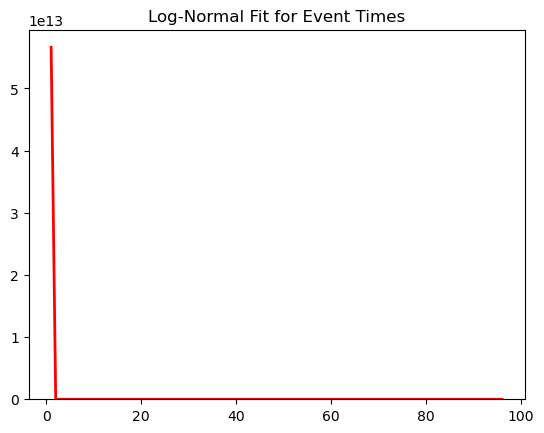

In [52]:
# Fit a log-normal distribution to event times
import scipy.stats as stats

shape, loc, scale = stats.lognorm.fit(event_times[event_times > 0])
plt.hist(event_times, bins=30, density=True, alpha=0.6, color='g')
x = np.linspace(event_times.min(), event_times.max(), 100)
plt.plot(x, stats.lognorm.pdf(x, shape, loc, scale), 'r-', lw=2)
plt.title('Log-Normal Fit for Event Times')
plt.show()

<Axes: >

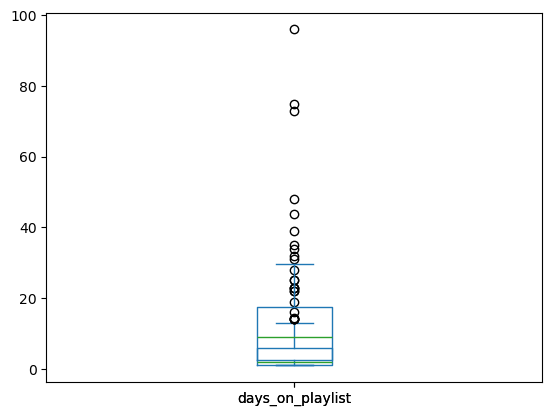

In [56]:
# Group by track and playlist
df.groupby('isrc')['days_on_playlist'].mean().plot(kind='box')
df.groupby('playlist_id')['days_on_playlist'].mean().plot(kind='box')

In [57]:
from surv_optimizer.models.MCMultiModel import RecurrentHierarchicalLogNormalAFTModel

coords = {
    "obs_id": range(len(df)),
    "preds": preds,
}

# Build and sample the model
recurrent_model = RecurrentHierarchicalLogNormalAFTModel(df, preds, coords, censored, event_times)
recurrent_model.build_model()
idata = recurrent_model.sample(recurrent_model.model)

Sampling: [beta, mu, sigma, tau_playlist, tau_track, u, v, y_obs]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, mu, sigma, tau_track, tau_playlist, u, v]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 75 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
C:\Users\runet\PycharmProjects\surv_mcmc\surv_optimizer\utils\MCModels.py:67: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  idata.extend(pm.sample_posterior_predictive(idata, model=model))
Sampling: [y_obs]


Output()

In [61]:
# Evaluate the model
times = np.linspace(0, df['days_on_playlist'].max(), 100)
ci, brier_scores = recurrent_model.evaluate_model(idata, times)
# Compute LOO and WAIC
loo = az.loo(idata)
print(f"Concordance Index: {ci}")
loo

Concordance Index: 0.9654015887025595


Computed from 4000 posterior samples and 328 observations log-likelihood matrix.

         Estimate       SE
elpd_loo  -137.02    41.93
p_loo       67.12        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.70]   (good)      318   97.0%
   (0.70, 1]   (bad)         5    1.5%
   (1, Inf)   (very bad)    5    1.5%

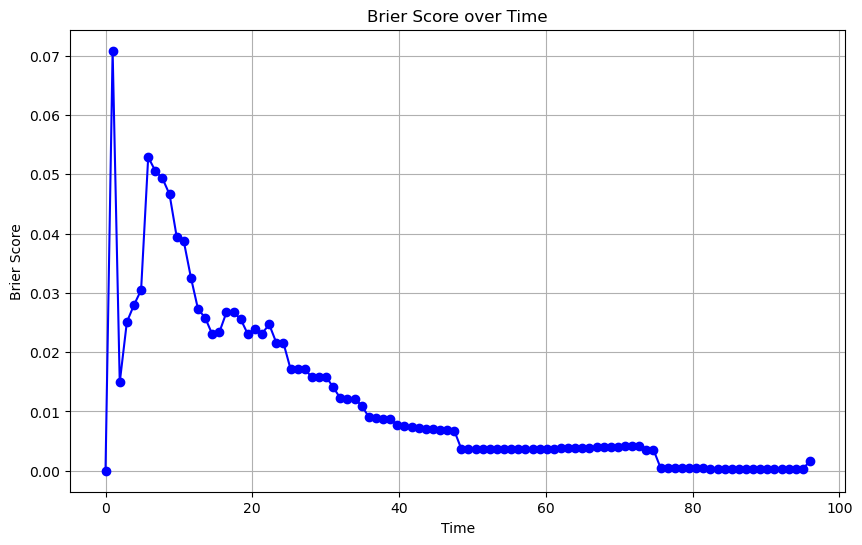

In [59]:
from surv_optimizer.models.MCMultiModel import plot_brier_score_over_time

plot_brier_score_over_time(times, brier_scores)

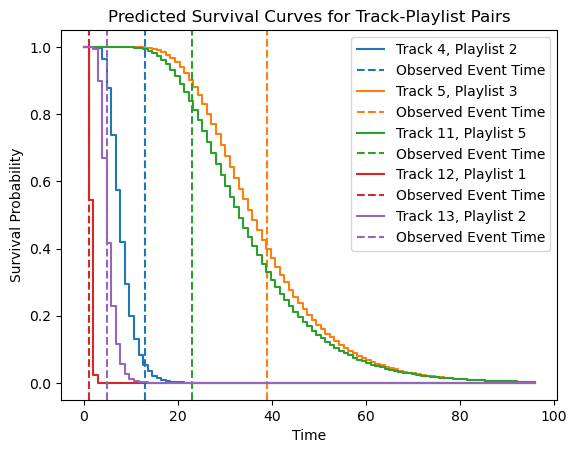

In [60]:
# Plot survival curves for specific track-playlist pairs
track_playlist_pairs = [(4, 2), (5, 3), (11, 5), (12, 1), (13, 2)]  # Example pairs
recurrent_model.plot_survival_curves(idata, times, track_playlist_pairs=track_playlist_pairs)

In [37]:
track_codes, unique_tracks = pd.factorize(df["isrc"])
playlist_codes, unique_playlists = pd.factorize(df["playlist_id"])
playlist_codes

array([ 0,  1,  1,  1,  2,  3,  4,  2,  2,  2,  1,  5,  1,  2,  1,  0,  2,
        2,  2,  6,  1,  0,  1,  2,  2,  1,  2,  1,  2,  1,  1,  1,  1,  0,
        2,  2,  2,  1,  1,  0,  3,  0,  2,  1,  1,  2,  2,  1,  1,  2,  2,
        2,  2,  2,  1,  2,  1,  0,  7,  2,  2,  2,  0,  1,  1,  1,  0,  2,
        2,  0,  7,  8,  9,  1,  3,  1,  1,  5,  8,  1,  1,  4,  2,  2,  2,
        1,  2,  2,  2,  1,  9,  5,  1,  8,  1,  4,  1,  3,  2,  2,  2,  3,
        2,  1,  1,  2,  1,  1,  1,  1,  4,  1,  2,  1,  3,  3,  1,  2,  2,
        1,  1,  1,  0,  0,  1,  2,  2,  2,  1,  0,  4,  1,  0,  2,  3,  1,
       10,  4,  2,  3,  1,  1,  1,  1,  0,  1,  2,  1,  1,  2,  8,  1,  1,
        1,  1,  2,  1,  2,  2,  0,  4,  1,  0,  0,  2,  1,  1,  2,  2,  1,
        2,  0,  3,  2,  1,  2,  2,  1,  1, 11,  1,  6,  0,  3,  2,  1,  2,
        3, 11, 11,  2,  2,  2,  2,  1,  3,  1,  1,  1,  1,  1,  1,  1,  3,
        2,  1,  1,  2,  3,  8,  0,  3,  1,  8,  1,  1,  0,  1,  2,  3,  2,
        2,  2,  0,  1,  0

In [38]:
track_codes

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  58,  59,  60,  61,  62,  63,
        64,  65,  65,  66,  67,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
        87,  88,  89,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
       124, 125, 126, 126, 127, 128, 129, 130, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 17

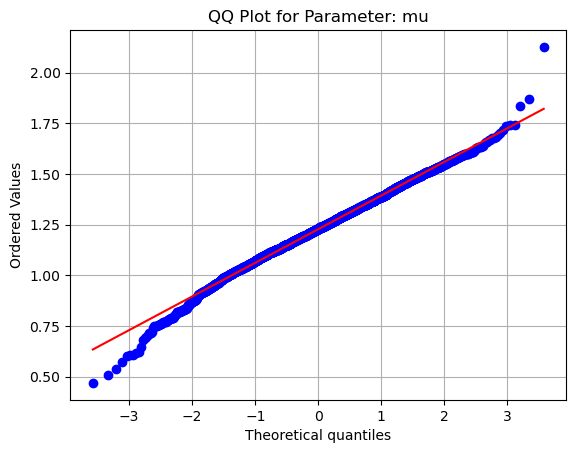

In [25]:
from surv_optimizer.models.MCMultiModel import plot_qq

plot_qq(idata)

array([[<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>],
       [<Axes: title={'center': 'u'}>, <Axes: title={'center': 'u'}>],
       [<Axes: title={'center': 'v'}>, <Axes: title={'center': 'v'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>],
       [<Axes: title={'center': 'tau_track'}>,
        <Axes: title={'center': 'tau_track'}>],
       [<Axes: title={'center': 'tau_playlist'}>,
        <Axes: title={'center': 'tau_playlist'}>],
       [<Axes: title={'center': 'eta'}>, <Axes: title={'center': 'eta'}>]],
      dtype=object)

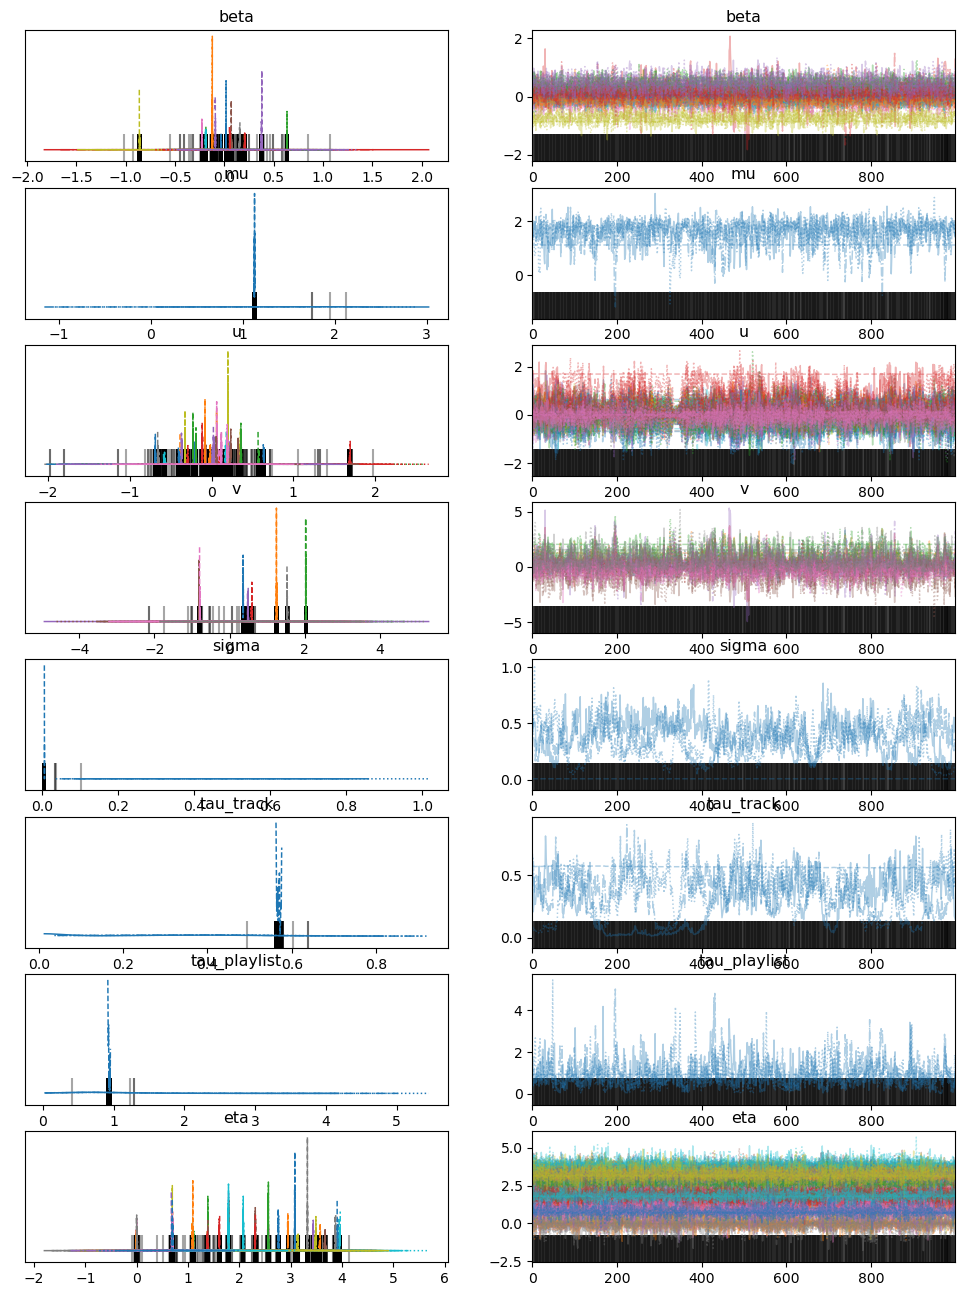

In [100]:
az.plot_trace(idata)

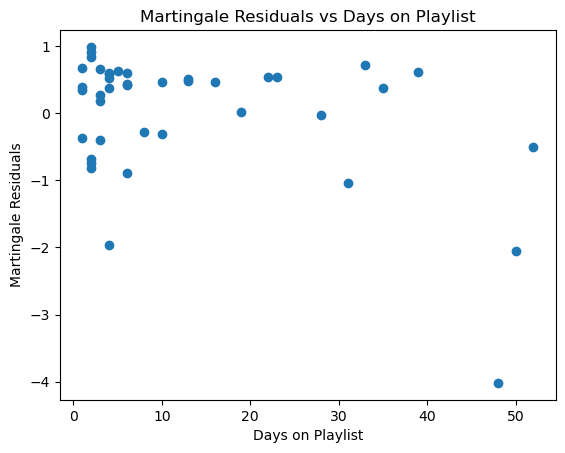

In [112]:
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt

# Assuming `df` contains your dataset
cox_model = CoxPHFitter()
cox_model.fit(df[preds + ['days_on_playlist', 'event_observed']], duration_col='days_on_playlist',
              event_col='event_observed')

# Calculate Martingale residuals
martingale_residuals = cox_model.compute_residuals(df[preds + ['days_on_playlist', 'event_observed']], 'martingale')
# Extract the necessary columns from martingale_residuals for plotting
days_on_playlist = martingale_residuals['days_on_playlist']
martingale_values = martingale_residuals['martingale']
plt.scatter(days_on_playlist, martingale_values)
plt.xlabel('Days on Playlist')
plt.ylabel('Martingale Residuals')
plt.title('Martingale Residuals vs Days on Playlist')
plt.show()

In [114]:
# Verify the length of both arrays to make sure they're the same
print("Days_on_playlist:", days_on_playlist)
print("Martingale_values:", martingale_values)

Days_on_playlist: 6      1.0
7      1.0
11     1.0
27     1.0
14     2.0
18     2.0
24     2.0
34     2.0
36     2.0
40     2.0
9      3.0
12     3.0
16     3.0
21     3.0
2      4.0
8      4.0
13     4.0
15     4.0
33     4.0
3      5.0
20     6.0
22     6.0
35     6.0
39     6.0
19     8.0
5     10.0
23    10.0
26    13.0
32    13.0
30    16.0
31    19.0
0     22.0
38    23.0
37    28.0
4     31.0
28    33.0
1     35.0
25    39.0
17    48.0
10    50.0
29    52.0
Name: days_on_playlist, dtype: float64
Martingale_values: 6     0.346449
7     0.666505
11    0.389716
27   -0.366352
14   -0.738943
18   -0.812954
24    0.985845
34   -0.678379
36    0.906982
40    0.833228
9     0.173511
12    0.652674
16   -0.394030
21    0.269221
2     0.378952
8     0.575642
13   -1.964695
15    0.518555
33    0.597261
3     0.628964
20    0.597352
22   -0.885874
35    0.425207
39    0.428108
19   -0.279614
5     0.462670
23   -0.308914
26    0.472162
32    0.505177
30    0.468304
31    0.012876
0     0.

In [122]:
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

quantile_data = SurvivalModelTester(data)
quantile_data.preprocess_data(minmax=True)
df_ = quantile_data.get_preprocessed_data()
scaler = MinMaxScaler(feature_range=(0.01, 0.99))

quantiles = [0.1, 0.25, 0.5]
qr_models = {}
# Log-transform the duration column for better interpretability
df_['log_days_on_playlist'] = np.log(df_['days_on_playlist'] + 1)

# Prepare the feature matrix X and target variable y
X = df_[preds]
y = df_['log_days_on_playlist']
X_scaled_const = sm.add_constant(X)  # Add intercept for statsmodels
# Fit quantile regression models for the selected quantiles
for q in quantiles:
    qr_model = sm.QuantReg(y, X_scaled_const)
    qr_result = qr_model.fit(q=q)
    qr_models[q] = qr_result
    print(f"Estimated Coefficients for {q * 100}th Quantile:\n", qr_result.params)
# Add a constant column for the intercept term

# Step 2: Generate Partial Dependence Plots for Covariates of Interest
for covariate in preds:
    # Select the covariate index for plotting (accounting for the constant term)
    covariate_index = preds.index(covariate) + 1  # Adjust for the constant term at index 0
    covariate_range = np.linspace(X[covariate].min(), X[covariate].max(), 100)

    # Create a base dataset with median values of other covariates
    median_values = np.median(X[:, :], axis=0)  # Median values of scaled predictors (not including intercept)
    base_data = np.tile(median_values, (len(covariate_range), 1))  # Repeat for each point in covariate range
    base_data = np.hstack((np.ones((len(covariate_range), 1)), base_data))  # Add intercept column (all ones)

    # Update the selected covariate to take the desired range of values
    covariate_values_scaled = scaler.transform(pd.DataFrame({covariate: covariate_range}))
    base_data[:, covariate_index] = covariate_values_scaled[:, 0]  # Set the covariate values in base_data

    # Plot Partial Dependence for each quantile model
    plt.figure(figsize=(10, 6))
    for q, qr_result in qr_models.items():
        # Predict quantile for given covariate values
        predictions = qr_result.predict(base_data)
        plt.plot(covariate_range, predictions, label=f"Quantile={q}")

    plt.xlabel(covariate)
    plt.ylabel("Predicted Log Survival Time")
    plt.title(f"Partial Dependence Plot for {covariate} on Lower Quantile Survival Time")
    plt.legend()
    plt.grid(True)
    plt.show()

Data preprocessing complete.
Estimated Coefficients for 10.0th Quantile:
 const                           0.291995
days_since_release              0.176303
playlist_cumulative_streams     2.109899
stream_acceleration            -1.801083
valence_distinctiveness         0.742162
artist_count                   -0.103529
skewness_streams                0.562424
engagement_ratio                2.554250
position_lag_7                  0.061664
top_track_contribution_ratio   -2.000771
artist_genre_performance       -1.232710
explicit_distinctiveness        0.250073
relative_popularity_to_genre    0.148533
position_changes                1.786224
last_position                   1.706700
variance_streams               -1.383964
dtype: float64
Estimated Coefficients for 25.0th Quantile:
 const                           1.318301
days_since_release             -0.120216
playlist_cumulative_streams     0.489972
stream_acceleration            -0.945522
valence_distinctiveness         0.340444
artis

C:\Users\runet\miniconda3\envs\pymc_new\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


InvalidIndexError: (slice(None, None, None), slice(None, None, None))

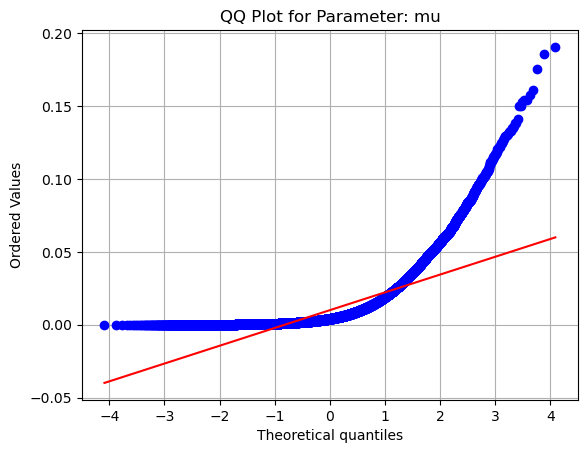

In [66]:
plot_qq(idata)

In [70]:
df

,isrc,playlist_id,days_on_playlist,days_since_release,streams_lag_1,streams_lag_7,position_lag_1,position_lag_7,playlist_cumulative_streams,playlist_growth_rate,...,streams_followers_interaction,artist_count,age_distinctiveness,instrumentalness_distinctiveness,valence_distinctiveness,explicit_distinctiveness,streams_popularity_ratio,top_track_contribution_ratio,event_observed,playlist_idx
0,USAT22205424,37i9dQZF1DWYs83FtTMQFw,22,-0.460169,-0.781281,-0.460834,0.407035,1.265130,-0.474114,-0.116950,...,-0.321908,-0.386695,-0.589734,0.021044,0.641205,2.048220,-0.497800,-0.806263,True,0
1,USAT22305462,37i9dQZF1DWYs83FtTMQFw,35,-0.403826,-0.731960,-0.360411,0.534672,1.104541,-0.117880,-0.028337,...,0.092526,-0.386695,-0.589734,0.021044,0.641205,2.048220,-0.507633,-0.996676,True,0
2,USAT22305462,6UeSakyzhiEt4NB3UAd6NQ,4,0.344734,-0.833546,-0.491929,1.236671,-0.854648,-0.623986,-0.286392,...,-0.496502,-0.386695,-0.553364,0.392264,0.463427,2.048220,-0.515840,0.363014,True,1
3,USAT22306272,37i9dQZF1DWYs83FtTMQFw,5,-0.291139,-0.505234,-0.194230,-0.965055,-0.244409,-0.436009,-0.228076,...,-0.277578,-0.386695,-0.589734,0.021044,0.641205,-0.351123,-0.480247,-0.679923,True,0
4,USAT22306274,2NoR0KhNZ8oZnC3HoNt2FV,31,1.455501,-0.828393,-0.478166,0.438944,0.654891,-0.605286,0.715671,...,-0.495085,-0.386695,1.952492,-1.181564,0.073795,-0.351123,-0.477000,-0.627063,True,2
5,USAT22307481,37i9dQZF1DWYs83FtTMQFw,10,-0.460169,-0.835754,-0.150901,-0.518328,-0.019584,-0.360309,-0.158336,...,-0.189510,-0.386695,-0.589734,0.021044,0.641205,-0.351123,-0.475723,-0.769391,True,0
6,USAT22307481,6UeSakyzhiEt4NB3UAd6NQ,1,-0.323336,-0.836490,-0.491929,-1.858509,-0.854648,-0.624613,-0.034082,...,-0.497074,-0.386695,-0.553364,0.392264,0.463427,-0.351123,-0.515763,2.100652,True,1
7,USAT22307525,37i9dQZEVXbKCF6dqVpDkS,1,-0.427973,-0.835018,-0.491929,-1.156510,-0.854648,-0.624809,-0.480700,...,-0.497305,-0.386695,-0.470051,3.248959,-1.372708,-0.351123,-0.516076,1.031337,True,3
8,USAT22307525,37i9dQZF1DWYs83FtTMQFw,4,-0.444071,-0.177658,0.327252,-1.730873,-0.726177,-0.360231,-0.336224,...,-0.189419,-0.386695,-0.589734,0.021044,0.641205,-0.351123,-0.419444,-0.343792,True,0
9,USUYG1371451,37i9dQZF1DWYs83FtTMQFw,3,-0.468218,0.574663,-0.491929,-0.645964,-0.854648,-0.156102,-0.294002,...,0.048059,3.576925,-0.589734,0.021044,0.641205,2.048220,-0.379572,-0.415758,True,0
